In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_excel("../3차결과.xlsx") 

df.head()

,학생명,제출 시간,문제 이름,정답 여부,오류 분류,코드,대분류,prediction
0,강지민,22.11.01 22:08,10보다작을까?-1,AC,NaN,#include <cstdio>\nint main(){\n int a;\n ...,NaN,1
1,권현욱,21.12.26 10:24,10보다작을까?-1,AC,NaN,#include<stdio.h>\nint main()\n{\nint a;\nscan...,NaN,1
2,김강범,22.07.30 18:11,10보다작을까?-1,AC,NaN,#include <cstdio>\n\nint main()\n{\n int a;...,NaN,1
3,김동우,22.11.05 10:41,10보다작을까?-1,AC,NaN,#include<cstdio>\nint main(){\n int a;\n ...,NaN,1
4,김민하,21.12.18 11:24,10보다작을까?-1,AC,NaN,"#include<cstdio>\nint main(){\nint a;\nscanf(""...",NaN,1


KeyError: '일자'

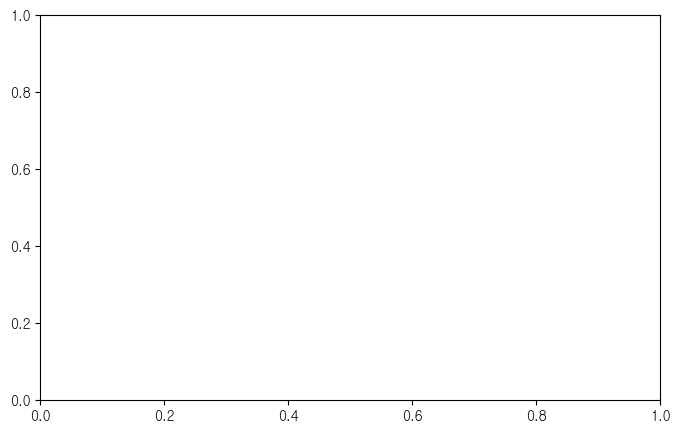

In [3]:
wa = df[df["정답 여부"] == "WA"]

fig = plt.figure(figsize=(8,5))


# 대분류 값들을 추출합니다.
categories = wa['대분류'].unique()

# 새로운 플롯을 생성합니다.
fig.add_subplot(1, 1, 1)  # subplot을 추가합니다.

# 대분류별로 차트를 그립니다.
for category in categories:
    category_subset = wa[wa['대분류'] == category]
    counts = category_subset['일자'].value_counts().sort_index()
    plt.plot(counts.index, counts.values, label=category)

# 플롯에 제목과 축 레이블을 추가합니다.
plt.title(f"전체 gkr의 오류 패턴 변화")
plt.xlabel("제출 일자")
plt.ylabel("오류 횟수")

# x축 레이블을 45도로 기울입니다.
plt.xticks(rotation=45)

# 범례를 표시합니다.
plt.legend()
    
# 전체 그래프를 한 번에 보여줍니다.
plt.tight_layout()  # 그래프들 사이의 간격을 조정합니다.
plt.show()

In [4]:
df2 = pd.read_excel("../학생별문제풀이순서및시도횟수.xlsx") 

df2 = df2.drop(["제출 시간"], axis=1)

df2.head()

,학생명,문제 이름,문제 순서,제출 횟수
0,강석준,두정수입력받기,1,7
1,강석준,두정수바꾸어출력하기,2,1
2,강석준,정수한개입력받아부호바꿔출력하기,3,2
3,강석준,시간단위로변환하기,4,7
4,강석준,사칙연산,5,8


In [5]:
# 조인 수행
result1 = pd.merge(df, df2, on=['학생명', '문제 이름'], how='inner')

result1 = result1.sort_values("문제 순서")

result1

,학생명,제출 시간,문제 이름,정답 여부,오류 분류,코드,대분류,prediction,문제 순서,제출 횟수
618,정진욱,22.03.13 19:48,두정수입력받기,WA,3,"#include <cstdio>\n\nint main()\n{\n int a,...",Incorrect syntax,6,1,8
636,강석준,21.05.23 16:19,두정수입력받기,WA,3,"#include<cstdio>\n\nint main()\n{\n int a,b...",Incorrect syntax,3,1,7
637,강석준,21.05.23 16:26,두정수입력받기,WA,0,"#include<cstdio>\n\nint main()\n{\n int a, ...",Output format mismatch,0,1,7
638,강석준,21.05.23 16:26,두정수입력받기,WA,3,"#include<cstdio>\n\nint main()\n{\n int a, ...",Incorrect syntax,0,1,7
639,강석준,21.05.23 16:33,두정수입력받기,AC,NaN,"#include<cstdio>\n\nint main()\n{\n int a,b...",NaN,0,1,7
...,...,...,...,...,...,...,...,...,...,...
145,홍동인,21.03.12 16:39,10보다작을까?-2,AC,NaN,#include <stdio.h>\nint main()\n{\n int a;\...,NaN,0,14,1
973,이연준,20.11.02 14:56,음수는0으로,AC,NaN,#include <cstdio>\n\nint main()\n{\nint n;\nsc...,NaN,4,14,1
972,유제연,22.02.12 21:14,음수는0으로,AC,NaN,#include<cstdio>\nint main()\n{\nint n;\nscanf...,NaN,4,14,1
970,신희석,22.07.22 18:37,음수는0으로,AC,NaN,"#include <cstdio>\n\nint main()\n{\n int a,...",NaN,4,14,1


In [6]:
# 문제 순서별 학생 수 계산
student_counts = df2['문제 순서'].value_counts().sort_index()

student_counts

문제 순서
1     53
2     53
3     53
4     53
5     53
6     53
7     53
8     53
9     52
10    51
11    51
12    51
13    50
14    45
Name: count, dtype: int64

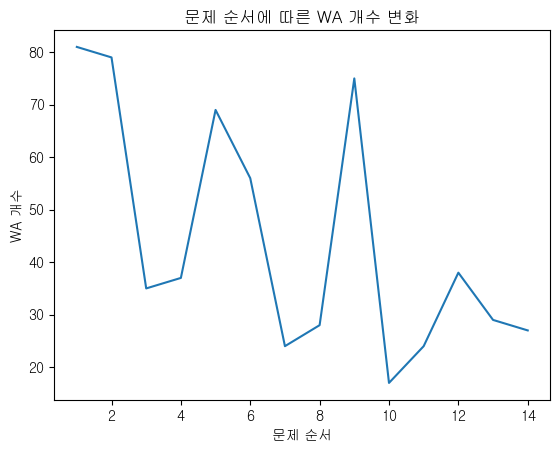

In [7]:
# 문제 순서에 따른 정답 여부의 개수 계산
wa = result1[result1['정답 여부'] == 'WA']
total_counts = wa.groupby('문제 순서').size()

# 그래프 그리기
plt.plot(total_counts.index, total_counts.values)
plt.xlabel('문제 순서')
plt.ylabel('WA 개수')
plt.title('문제 순서에 따른 WA 개수 변화')
plt.show()

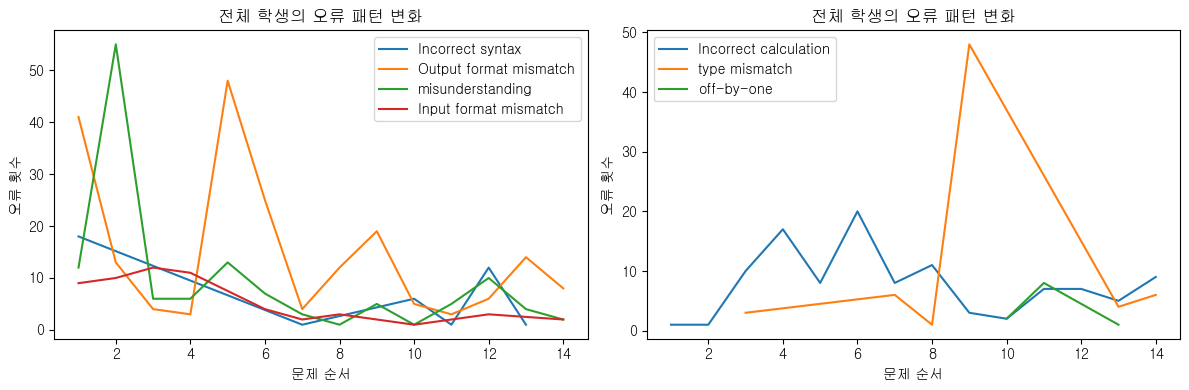

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

wa = result1[result1["정답 여부"] == "WA"]
categories = wa['대분류'].unique()
half_length = len(categories) // 2

for i, ax in enumerate(axes):
    if i == 0:
        categories_subset = categories[:half_length+1]
        ax.set_title("전체 학생의 오류 패턴 변화")
    else:
        categories_subset = categories[half_length+1:]
        ax.set_title("전체 학생의 오류 패턴 변화")
    
    for category in categories_subset:
        category_subset = wa[wa['대분류'] == category]
        counts = category_subset['문제 순서'].value_counts().sort_index()
        ax.plot(counts.index, counts.values, label=category)

    ax.set_xlabel("문제 순서")
    ax.set_ylabel("오류 횟수")
    ax.legend()

plt.tight_layout()
plt.show()

In [9]:
df3 = pd.read_excel("../학생들의그룹정보.xlsx") 

df3 = df3.drop(["정답률"], axis=1)

df3.head()

,학생명,그룹
0,강석준,group2
1,강수인,group1
2,강지민,group1
3,권현욱,group1
4,김가영,group2


In [10]:
result2 = pd.merge(result1, df3, on='학생명')

result2.head()

,학생명,제출 시간,문제 이름,정답 여부,오류 분류,코드,대분류,prediction,문제 순서,제출 횟수,그룹
0,정진욱,22.03.13 19:48,두정수입력받기,WA,3,"#include <cstdio>\n\nint main()\n{\n int a,...",Incorrect syntax,6,1,8,group3
1,정진욱,22.03.13 19:51,두정수입력받기,WA,NaN,"#include <cstdio>\n\nint main()\n{\n int a,...",misunderstanding,2,1,8,group3
2,정진욱,22.03.13 19:52,두정수입력받기,WA,NaN,"#include <cstdio>\n\nint main()\n{\n int a,...",misunderstanding,2,1,8,group3
3,정진욱,22.03.26 12:25,두정수입력받기,WA,NaN,"#include <cstdio>\n\nint main()\n{\n int a,...",misunderstanding,2,1,8,group3
4,정진욱,22.03.13 19:47,두정수입력받기,WA,2,"#include <cstdio>\n\nint main()\n{\n int a,...",Output format mismatch,0,1,8,group3


In [11]:
def finish(student):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    wa = result2[(result2["정답 여부"] == "WA") & (result2['그룹'] == student)]
    categories = wa['대분류'].unique()
    half_length = len(categories) // 2

    for i, ax in enumerate(axes):
        if i == 0:
            categories_subset = categories[:half_length+1]
            ax.set_title(f"{student}의 오류 패턴 변화")
        else:
            categories_subset = categories[half_length+1:]
            ax.set_title(f"{student}의 오류 패턴 변화")
        
        for category in categories_subset:
            category_subset = wa[wa['대분류'] == category]
            counts = category_subset['문제 순서'].value_counts().sort_index()
            ax.plot(counts.index, counts.values, label=category)

        ax.set_xlabel("문제 순서")
        ax.set_ylabel("오류 횟수")
        ax.legend()

    plt.tight_layout()
    plt.show()

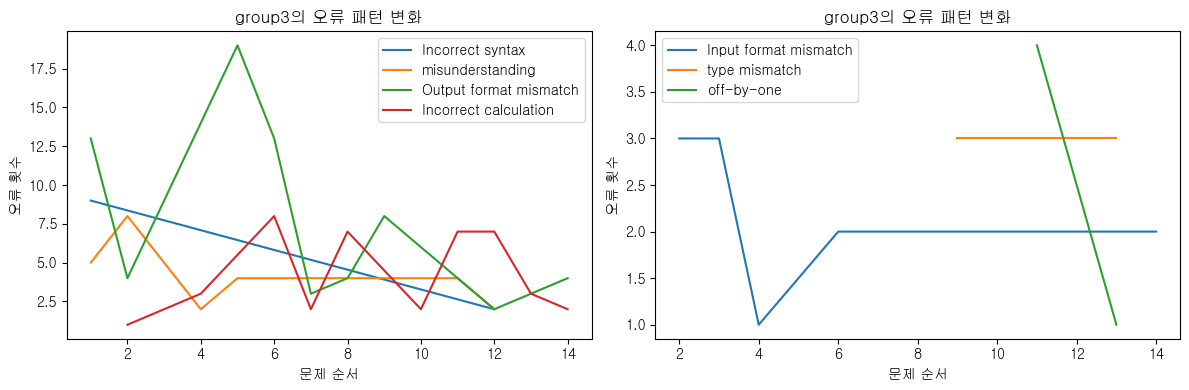

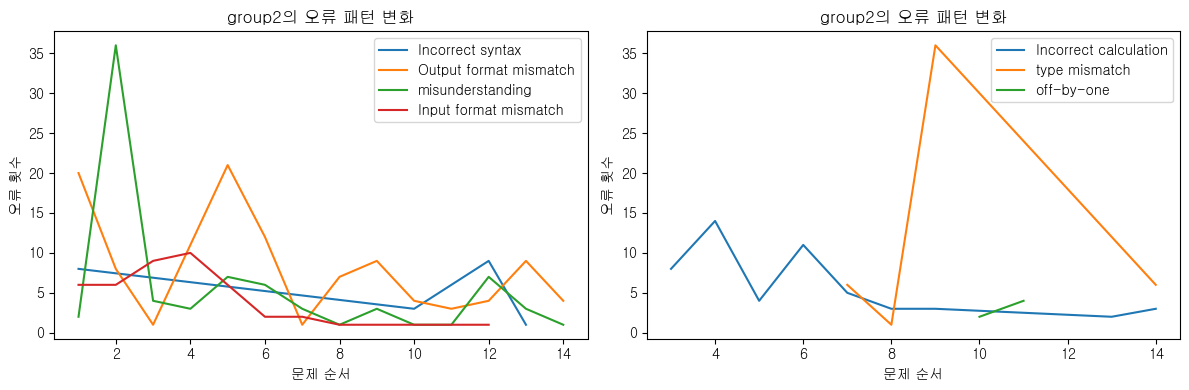

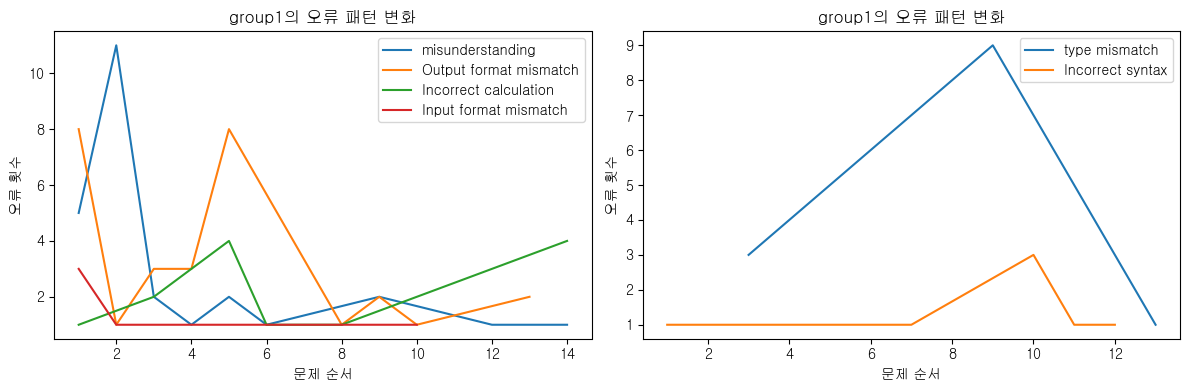

In [12]:
wa = result2[result2["정답 여부"] == "WA"]

# 학생명을 추출합니다.
students = wa['그룹'].unique()

# 학생별로 차트를 개별적으로 생성합니다.
for student in students:
    finish(student)

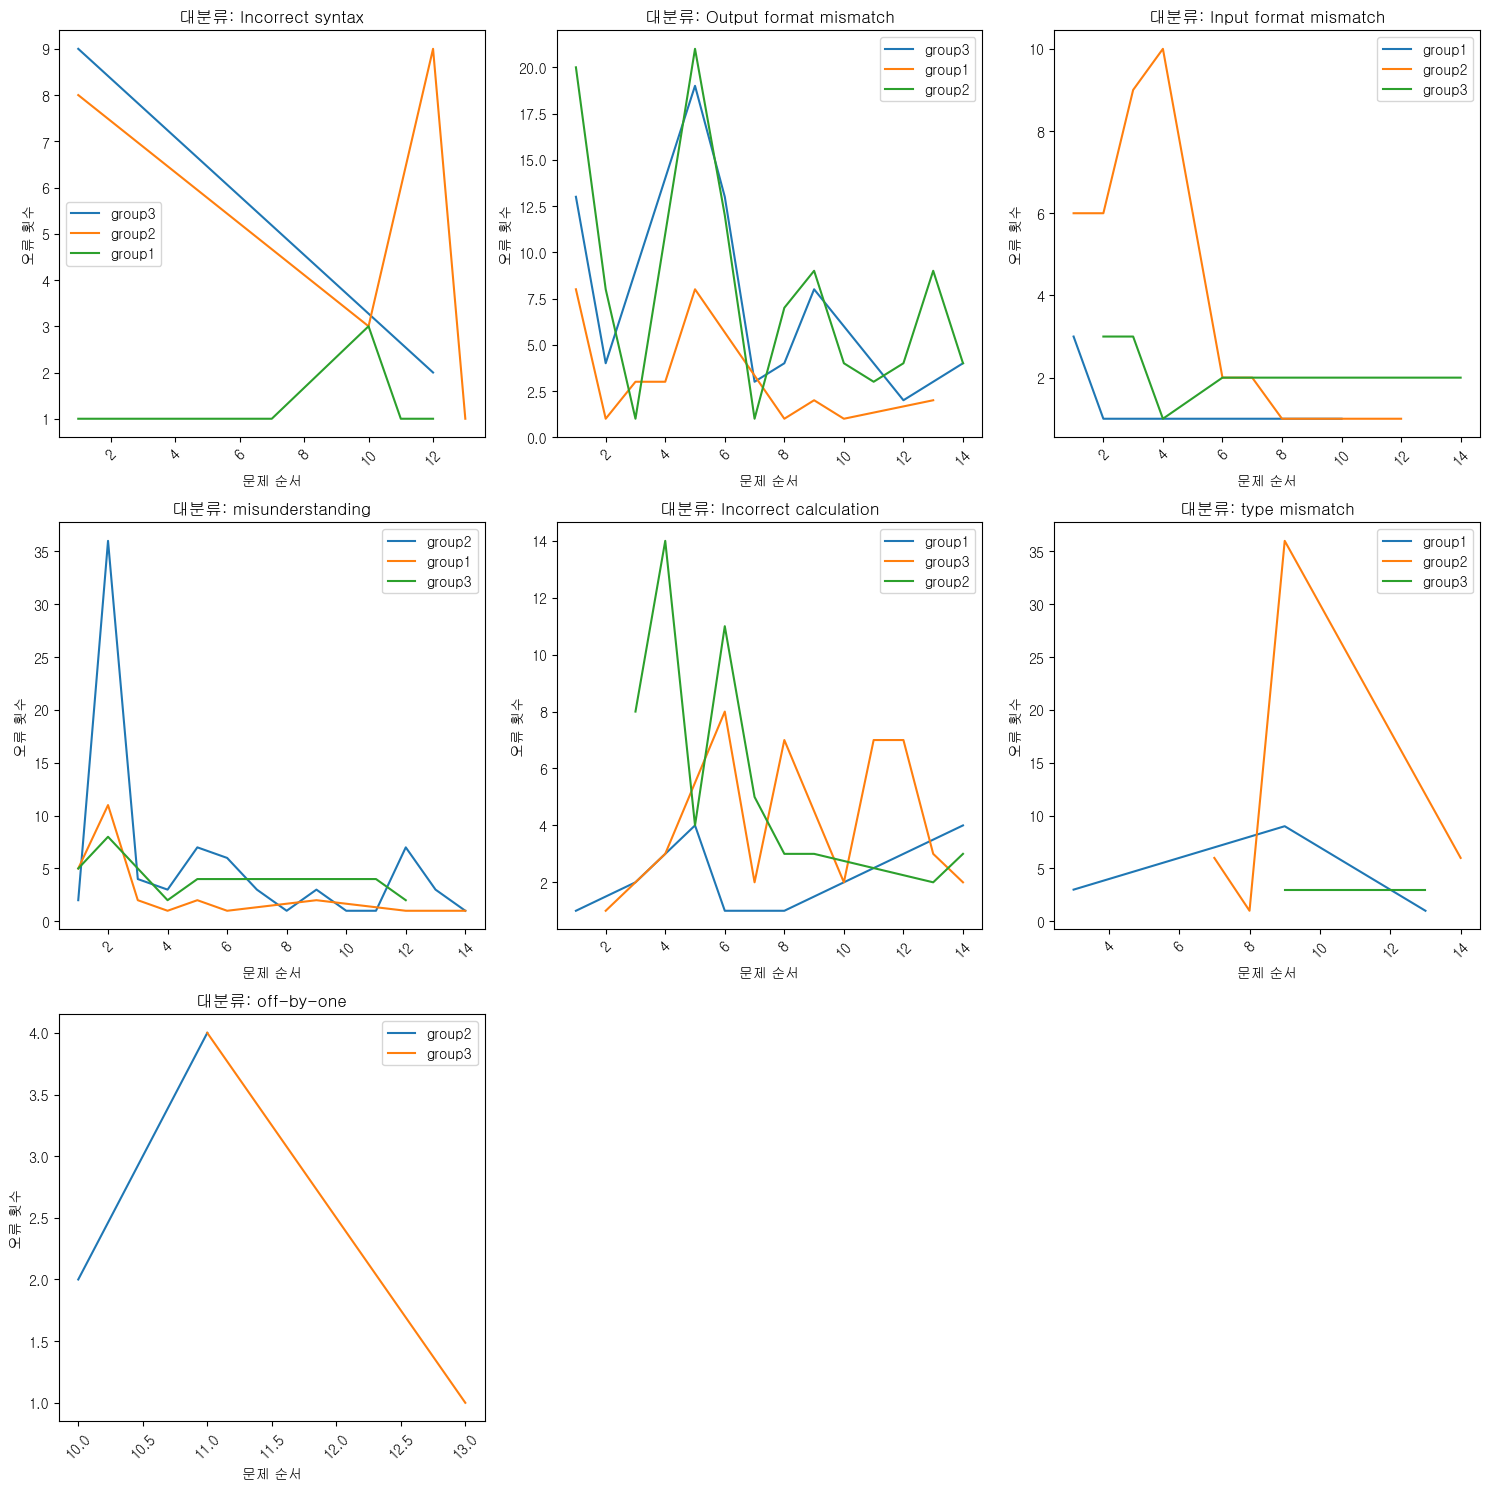

In [16]:
df = result2.loc[result2["정답 여부"] == "WA", :]

df = df.sort_values("문제 순서")
# 대분류 값들을 추출합니다.
categories = df['대분류'].unique()


# 전체 그래프 개수를 계산합니다.
num_plots = len(categories)
# 한 줄에 보여질 그래프 개수를 설정합니다.
num_plots_per_row = 3
# 전체 행 수를 계산합니다.
num_rows = int(np.ceil(num_plots / num_plots_per_row))

fig = plt.figure(figsize=(15,15))

# 대분류 값에 따라 차트를 개별적으로 생성합니다.
for i, category in enumerate(categories):
    subset = df[df['대분류'] == category]
    
    # 학생별 시간에 따른 오류 횟수를 계산합니다.
    students = subset['그룹'].unique()
    
    fig.add_subplot(num_rows, num_plots_per_row, i + 1)  # subplot을 추가합니다.
    
    # 학생별로 차트를 그립니다.
    for student in students:
        student_subset = subset[subset['그룹'] == student]
        counts = student_subset['문제 순서'].value_counts().sort_index()
        plt.plot(counts.index, counts.values, label=student)
    
    # 플롯에 제목과 축 레이블을 추가합니다.
    plt.title(f"대분류: {category}")
    plt.xlabel("문제 순서")
    plt.ylabel("오류 횟수")
    
    # x축 레이블을 45도로 기울입니다.
    plt.xticks(rotation=45)
    
    # 범례를 표시합니다.
    plt.legend()
    
# 전체 그래프를 한 번에 보여줍니다.
plt.tight_layout()  # 그래프들 사이의 간격을 조정합니다.
plt.show()